This notebook includes information about the commands and files used to train the Allegro models and print the training metrics to evaluate training performance. For additional information on the description of the model Architecture and parameters, readers of this notebook are refered to Allegro documentation and tutorial links provided below:

- https://arxiv.org/abs/2204.05249
- https://github.com/mir-group/allegro
- https://colab.research.google.com/drive/1yq2UwnET4loJYg_Fptt9kpklVaZvoHnq

The configuration files used to generate the models used in our paper are provided in the current working directory. To train a spcecific model uncomment the comamnd block specified for it. For tutorial puroposes we will continue working with the moel trained with the Boltzmann Distribution. 

This notebook assumes a working installation of the Allegro package. Ideally with GPU usability. 

In [1]:
# imports
import os

In [2]:
## Allegro (and Nequip) command for training the model of ADP with Boltzmann Distribution 2500 frames
train_config_file = 'ADP_Boltz_2500frames_SPC.yaml'

# ## Allegro (and Nequip) command for training the model of ADP with Boltzmann Distribution 5000 frames
# train_config_file = 'ADP_Boltz_5000frames_SPC.yaml'

# ## Allegro (and Nequip) command for training the model of ADP with Uniform Distribution 2500 frames
# train_config_file = 'ADP_Univ2D_2500framesSPC.yaml'

# ## Allegro (and Nequip) command for training the model of ADP with Uniform Distribution 5000 frames
# train_config_file = 'ADP_Univ2D_5000frames_SPC.yaml'

## Unbias 500
# train_config_file = 'ADP_Unbias_500frames_SPC.yaml'

## Unbias 1000
# train_config_file = 'ADP_Unbias_1000frames_SPC.yaml'

## Unbias 2500
# train_config_file = 'ADP_Unbias_2500frames_SPC.yaml'

## Only Mins 500
# train_config_file = 'ADP_OnlyMins_500frames_SPC.yaml'

## Only Mins 1000
# train_config_file = 'ADP_OnlyMins_1000frames_SPC.yaml'

## Only Mins 2500
# train_config_file = 'ADP_OnlyMins_2500frames_SPC.yaml'

## Characteristic Regions 500
# train_config_file = 'ADP_CharReg_500frames_SPC.yaml'

## Characteristic Regions 1000
# train_config_file = 'ADP_CharReg_1000frames_SPC.yaml'

## Characteristic Regions 2500
# train_config_file = 'ADP_CharReg_2500frames_SPC.yaml'

In [3]:
# ## Run the training command 
# os.system(f'nequip-train {train_config_file}')

After training a directorey named, results will be generated. For effects of the tutorial the current results directory has the training metrics for the model trained with the Uniform Distribution and 2500. The next step is to vizualize the trainig metrics. For this read the metrics_epochs.csv file generated in the results dictionary during training of the model

In [4]:
# imports 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ase.io import read
from sklearn.metrics import r2_score


In [5]:
# Define path to 'metrics_epocs.csv' file. Load it and print the names of the columns whic can be called 
epoch_metrics_file = './results/ADP_Univ2D_2500frames_SPC_500K/ADP_Univ2D_2500frames_SPC_500K/metrics_epoch.csv'

# Load to pandas data frame 
epoch_metrics = pd.read_csv(epoch_metrics_file)

# Print metrics that can be plotted
for i, metric in enumerate(epoch_metrics.columns):
    print(f'{i}. {metric}')


0. epoch
1.  wall
2.  LR
3. training_loss_f
4. training_loss_e
5. training_loss
6. training_f_mae
7. training_f_rmse
8. training_H_f_mae
9. training_C_f_mae
10. training_N_f_mae
11. training_O_f_mae
12. training_psavg_f_mae
13. training_H_f_rmse
14. training_C_f_rmse
15. training_N_f_rmse
16. training_O_f_rmse
17. training_psavg_f_rmse
18. training_e_mae
19. training_e/N_mae
20. validation_loss_f
21. validation_loss_e
22. validation_loss
23. validation_f_mae
24. validation_f_rmse
25. validation_H_f_mae
26. validation_C_f_mae
27. validation_N_f_mae
28. validation_O_f_mae
29. validation_psavg_f_mae
30. validation_H_f_rmse
31. validation_C_f_rmse
32. validation_N_f_rmse
33. validation_O_f_rmse
34. validation_psavg_f_rmse
35. validation_e_mae
36. validation_e/N_mae


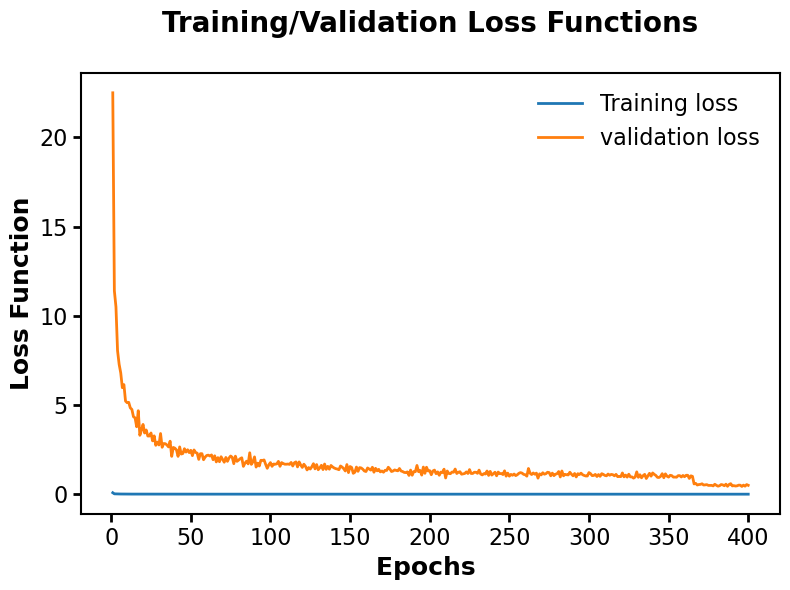

In [6]:
# Define plot 1 and plot 2 number to select wich metrics are to be plotted
plot_1 = 5
plot_2 = 18

plt.figure(figsize=(8, 6))
# plt.plot(epoch_metrics['epoch'],epoch_metrics['training_loss'],label='Training loss',linewidth=2)
# plt.plot(epoch_metrics['epoch'],epoch_metrics['validation_loss'],label='validation loss',linewidth=2)
plt.plot(epoch_metrics['epoch'],epoch_metrics[epoch_metrics.columns[plot_1]],label='Training loss',linewidth=2)
plt.plot(epoch_metrics['epoch'],epoch_metrics[epoch_metrics.columns[plot_2]],label='validation loss',linewidth=2)


plt.xlabel('Epochs ',fontsize=18,fontweight='bold')
plt.ylabel('Loss Function',fontsize=18,fontweight='bold')
plt.title('Training/Validation Loss Functions\n',fontsize=20,fontweight='bold')
plt.legend(loc='upper right',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14,width=2,length=6)
# Bold borders 
for spine in plt.gca().spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.5)

# Increase tick size
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.legend(loc='upper right',fontsize=16,frameon=False)
#plt.savefig('ModelA_Loss.png', dpi=400, bbox_inches='tight')
plt.show()


Now that the model has finish training we can proceeed to build the model, in the format in which will be used for testing and molecular dynamic simulations. For tutorial purposes we will continue to work with the model trained with the Uniform distribution (2500 Frames) but code relevant to other models is included in comments. To prepare either of the other models uncomment the relevant code in all dependent notebooks. 

In [ ]:
# # Run the code below to build the model train with Uniform Distribution 
name = 'ADP_SPC_UnivDist_2500'
# os.system(f'nequip-deploy build --train-dir results_UD_2500/ADP_Univ2D_2500frames_SPC_500K/ADP_Univ2D_2500frames_SPC_500K/ ./{name}.pth')

# Uniform Dist 5000
name = 'ADP_SPC_UnivDist_5000'
# os.system(f'nequip-deploy build --train-dir results_UD_5000/ADP_Univ2D_2500frames_SPC_500K/ADP_Univ2D_2500frames_SPC_500K/ ./{name}.pth')

# Boltzmann DIstribution 2500
name = 'ADP_SPC_BoltzDist_2500'
# os.system(f'nequip-deploy build --train-dir results_BD_2500/ADP_Univ2D_2500frames_SPC_500K/ADP_Univ2D_2500frames_SPC_500K/ ./{name}.pth')

# Boltzmann DIstribution 5000
name = 'ADP_SPC_BoltzDist_5000'
# os.system(f'nequip-deploy build --train-dir results_BD_5000/ADP_Univ2D_2500frames_SPC_500K/ADP_Univ2D_2500frames_SPC_500K/ ./{name}.pth')

# Unbias 500
name = 'ADP_SPC_Unbias_500'
# os.system(f'nequip-deploy build --train-dir results_Unbias_500/ADP_Univ2D_2500frames_SPC_500K/ADP_Univ2D_2500frames_SPC_500K/ ./{name}.pth')

# Unbias 1000
name = 'ADP_SPC_Unbias_1000'
# os.system(f'nequip-deploy build --train-dir results_Unbias_1000/ADP_Univ2D_2500frames_SPC_500K/ADP_Univ2D_2500frames_SPC_500K/ ./{name}.pth')

# Unbias 2500
name = 'ADP_SPC_Unbias_2500'
# os.system(f'nequip-deploy build --train-dir results_Unbias_2500/ADP_Univ2D_2500frames_SPC_500K/ADP_Univ2D_2500frames_SPC_500K/ ./{name}.pth')

# Only Minima 500
name = 'ADP_SPC_Omin_500'
# os.system(f'nequip-deploy build --train-dir results_Omin_500/ADP_Univ2D_2500frames_SPC_500K/ADP_Univ2D_2500frames_SPC_500K/ ./{name}.pth')

# Only Minima 1000
name = 'ADP_SPC_Omin_1000'
# os.system(f'nequip-deploy build --train-dir results_Omin_1000/ADP_Univ2D_2500frames_SPC_500K/ADP_Univ2D_2500frames_SPC_500K/ ./{name}.pth')

# Only Minima 2500
name = 'ADP_SPC_Omin_2500'
# os.system(f'nequip-deploy build --train-dir results_Omin_2500/ADP_Univ2D_2500frames_SPC_500K/ADP_Univ2D_2500frames_SPC_500K/ ./{name}.pth')

# Characteristic Regions 500
name = 'ADP_SPC_CharReg_500'
# os.system(f'nequip-deploy build --train-dir results_CharReg_500/ADP_Univ2D_2500frames_SPC_500K/ADP_Univ2D_2500frames_SPC_500K/ ./{name}.pth')

# Characteristic Regions 1000
name = 'ADP_SPC_CharReg_1000'
# os.system(f'nequip-deploy build --train-dir results_CharReg_1000/ADP_Univ2D_2500frames_SPC_500K/ADP_Univ2D_2500frames_SPC_500K/ ./{name}.pth')

# Characteristic Regions 2500
name = 'ADP_SPC_CharReg_2500'
# os.system(f'nequip-deploy build --train-dir results_CharReg_2500/ADP_Univ2D_2500frames_SPC_500K/ADP_Univ2D_2500frames_SPC_500K/ ./{name}.pth')


Now that the model is build we can used to valuate its accuracy to predict the potential energy and atomic forces of cconfigutrations included in a test dataset. NOte that for tutorial purposes only a test dataset was created for the model trained with the Uniform distribution. The proces to generate this test datasets is the same as the one explained for the training datasets in the prep_train_SPC directory. 

Additionally, to evaluate the models with a dataset different to the one used for training one has to change the path of the config.yaml file inside the results_*/ADP_Univ2D_2500frames_SPC_500K/ADP_Univ2D_2500frames_SPC_500K/. In this file, change the "dataset_file_name" key to the path of the testing data set. For best practices create a copy of the config.yaml file and call it config_test.yaml. 



In [7]:
# ## Uncomment the code bellow to evaluate the test data of the Uniform Distribution model 
# output = 'ADP_UnivDist_2500_SPC_test'
# os.system(f"nequip-evaluate --dateset-config results_UD_2500/ADP_Univ2D_2500frames_SPC_500K/ADP_Univ2D_2500frames_SPC_500K/config_test.yaml --model {name}.pth  --batch-size 1 --output {output}.xyz --device cpu")

# output = 'ADP_UnivDist_5000_SPC_test'
# os.system(f"nequip-evaluate --dateset-config results_UD_5000/ADP_Univ2D_2500frames_SPC_500K/ADP_Univ2D_2500frames_SPC_500K/config_test.yaml --model {name}.pth  --batch-size 1 --output {output}.xyz --device cpu")

# Boltzmann DIstribution 2500
# os.system(f"nequip-evaluate --dateset-config results_BD_2500/ADP_Univ2D_2500frames_SPC_500K/ADP_Univ2D_2500frames_SPC_500K/config_test.yaml --model {name}.pth  --batch-size 1 --output {output}.xyz --device cpu")

# Boltzmann DIstribution 5000
# os.system(f"nequip-evaluate --dateset-config results_BD_5000/ADP_Univ2D_2500frames_SPC_500K/ADP_Univ2D_2500frames_SPC_500K/config_test.yaml --model {name}.pth  --batch-size 1 --output {output}.xyz --device cpu")

# Unbias 500
# os.system(f"nequip-evaluate --dateset-config results_Unbias_500/ADP_Univ2D_2500frames_SPC_500K/ADP_Univ2D_2500frames_SPC_500K/config_test.yaml --model {name}.pth  --batch-size 1 --output {output}.xyz --device cpu")

# Unbias 1000
# os.system(f"nequip-evaluate --dateset-config results_Unbias_1000/ADP_Univ2D_2500frames_SPC_500K/ADP_Univ2D_2500frames_SPC_500K/config_test.yaml --model {name}.pth  --batch-size 1 --output {output}.xyz --device cpu")

# Unbias 2500
# os.system(f"nequip-evaluate --dateset-config results_Unbias_2500/ADP_Univ2D_2500frames_SPC_500K/ADP_Univ2D_2500frames_SPC_500K/config_test.yaml --model {name}.pth  --batch-size 1 --output {output}.xyz --device cpu")

# Only Mins 500
# os.system(f"nequip-evaluate --dateset-config results_Omin_500/ADP_Univ2D_2500frames_SPC_500K/ADP_Univ2D_2500frames_SPC_500K/config_test.yaml --model {name}.pth  --batch-size 1 --output {output}.xyz --device cpu")

# Only Mins 1000
# os.system(f"nequip-evaluate --dateset-config results_Omin_1000/ADP_Univ2D_2500frames_SPC_500K/ADP_Univ2D_2500frames_SPC_500K/config_test.yaml --model {name}.pth  --batch-size 1 --output {output}.xyz --device cpu")

# Only Mins 2500
# os.system(f"nequip-evaluate --dateset-config results_Omin_2500/ADP_Univ2D_2500frames_SPC_500K/ADP_Univ2D_2500frames_SPC_500K/config_test.yaml --model {name}.pth  --batch-size 1 --output {output}.xyz --device cpu")


At this point the model has been evaluated against a data set and the predictions are stored in a file name {output}.xyz. Use this file in combination to the test dataset (npz format) to compare predicted vs actual values and calculate accuracy metrics. 

In [8]:
## Define path to test results (xyz evaluation output) and the test data (npz file)

test_results = './ADP_Univ2D_SPC_2500F_Test.xyz'
test_data  = '../UniformDist/prep_train_SPC/ADP_UnivDist_5000_SPC.npz'

# read xyz with ase and load npz with numpy 
test_results = read(test_results,index = ':')
test_data = np.load(test_data)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


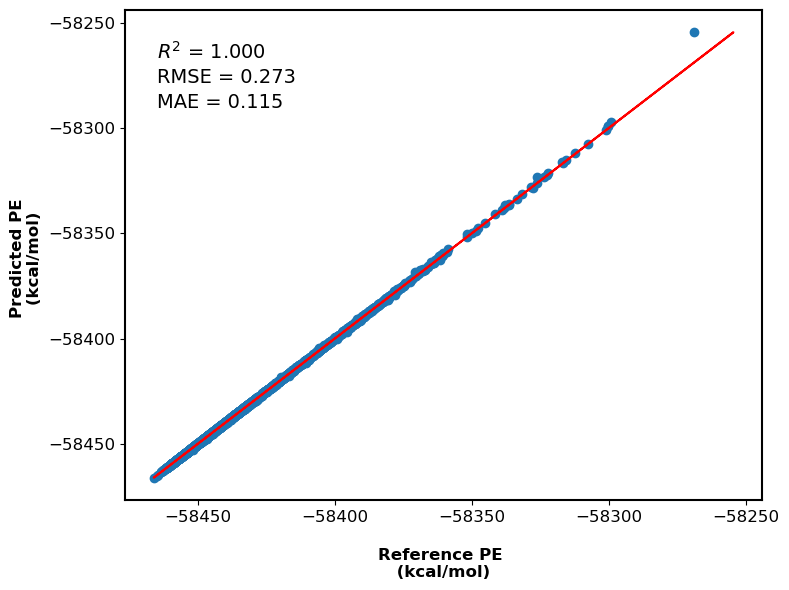

In [9]:
# Repeat for test data

# Create an array of zerow of length test_results to store energies
energies_test = np.zeros(len(test_results))

# Create a for loop to read each of the energies from the test_results file and store them in the array
for i in range(len(test_results)):
    energies_test[i] = test_results[i].get_potential_energy()
    
# Separate the energy from the test data
test_data_e = test_data['E']

#  Determinme the R2 value for the energies using numpy
r2_test = r2_score(test_data_e, energies_test)

# Determine the rmse
rmse_test = np.sqrt(np.mean((test_data_e - energies_test)**2))

# Determine the MAE
mae_test = np.mean(np.abs(test_data_e - energies_test))

#Plot the energies for the train data
plt.figure(figsize=(8,6))
#plt.title('Energy NNFF-Predictions vs Test Data \n',fontsize=20,fontweight='bold')
plt.scatter(energies_test, test_data_e)
plt.plot(test_data_e, test_data_e, color='red')
plt.text(0.05, 0.9, '$R^2$ = %0.3f' % r2_test, transform=plt.gca().transAxes, fontsize=14)
plt.text(0.05, 0.85, 'RMSE = %0.3f' % rmse_test, transform=plt.gca().transAxes, fontsize=14)
plt.text(0.05, 0.8, 'MAE = %0.3f' % mae_test, transform=plt.gca().transAxes, fontsize=14)

plt.xlabel('\nReference PE \n (kcal/mol) ',fontsize=12,fontweight='bold')
plt.ylabel('Predicted PE \n(kcal/mol) ',fontsize=12,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=11,loc='upper left',frameon=False)

# Darken the borders of the plot
ax = plt.gca()
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

plt.tight_layout()

# save the plot
# plt.savefig('BD_EPred_test.png', dpi=400)
plt.show()


In [11]:
# FOr the forces
# REad the forces from the .xyz file 
forces = np.zeros((len(test_results), 22, 3))
for i in range(len(test_results)):
    forces[i] = test_results[i].get_forces()

# Define the prediction and test array of the forces in x, y, and z directions 
test_pred_fx = forces[:,:,0]
test_pred_fy = forces[:,:,1]
test_pred_fz = forces[:,:,2]

test_fx = test_data['F'][:,:,0]
test_fy = test_data['F'][:,:,1]
test_fz = test_data['F'][:,:,2]

# Determine r2 value for the forces in the x direction
test_r2_fx = r2_score(test_pred_fx, test_fx)
# Determine r2 value for the forces in the y direction
test_r2_fy = r2_score(test_pred_fy, test_fy)
# Determine r2 value for the forces in the z direction
test_r2_fz = r2_score(test_pred_fz, test_fz)

# Determine the rmse for the three directions
test_rmse_fx = np.sqrt(np.mean((test_pred_fx - test_fx)**2))
test_rmse_fy = np.sqrt(np.mean((test_pred_fy - test_fy)**2))
test_rmse_fz = np.sqrt(np.mean((test_pred_fz - test_fz)**2))

# Detemrine the MAE for the three directions
test_mae_fx = np.mean(np.abs(test_pred_fx - test_fx))
test_mae_fy = np.mean(np.abs(test_pred_fy - test_fy))
test_mae_fz = np.mean(np.abs(test_pred_fz - test_fz))


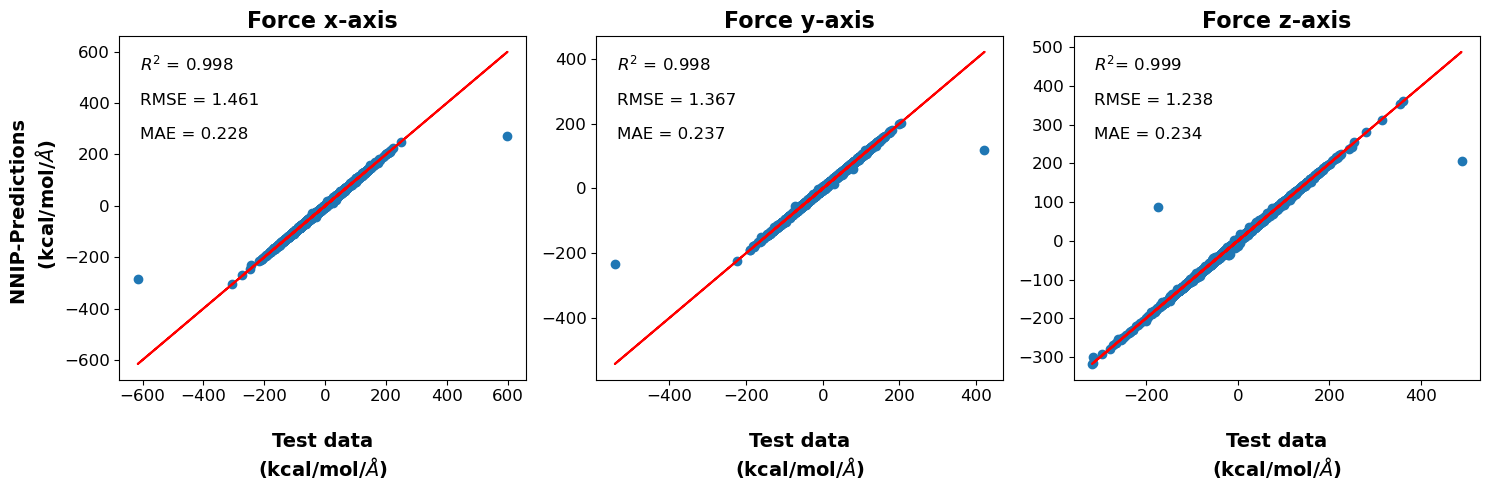

In [12]:
## Plot panels of force component prediction analysis
# Create a figure with one row and three columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Add vertical and horizontal space between the subplots
fig.subplots_adjust(hspace=0.5, wspace=0.2)

# Add title to the figure
#fig.suptitle('Butane Model BD Force Prediction Test \n', fontsize=16, fontweight='bold')

# Plot the predicted forces in the x direction vs the test forces in the x direction
axs[0].scatter(test_fx, test_pred_fx)
axs[0].plot(test_fx, test_fx, color='red')
axs[0].text(0.05, 0.9, '$R^2$ = %0.3f' % test_r2_fx, transform=axs[0].transAxes, fontsize=12)
axs[0].text(0.05, 0.8, 'RMSE = %0.3f' % test_rmse_fx, transform=axs[0].transAxes, fontsize=12)
axs[0].text(0.05, 0.7, 'MAE = %0.3f' % test_mae_fx, transform=axs[0].transAxes, fontsize=12)
axs[0].set_title('Force x-axis', fontsize=16, fontweight='bold')
axs[0].set_xlabel('\nTest data\n(kcal/mol/$\\AA$)', fontsize=14, fontweight='bold')
axs[0].set_ylabel('NNIP-Predictions \n (kcal/mol/$\\AA$)', fontsize=14, fontweight='bold')
axs[0].tick_params(axis='both', which='major', labelsize=12)

# Plot the predicted forces in the y direction vs the test forces in the y direction
axs[1].scatter(test_fy, test_pred_fy)
axs[1].plot(test_fy, test_fy, color='red')
axs[1].text(0.05, 0.9, '$R^2$ = %0.3f' % test_r2_fy, transform=axs[1].transAxes, fontsize=12)
axs[1].text(0.05, 0.8, 'RMSE = %0.3f' % test_rmse_fy, transform=axs[1].transAxes, fontsize=12)
axs[1].text(0.05, 0.7, 'MAE = %0.3f' % test_mae_fy, transform=axs[1].transAxes, fontsize=12)
axs[1].set_title('Force y-axis', fontsize=16, fontweight='bold')
axs[1].set_xlabel('\nTest data\n(kcal/mol/$\\AA$)', fontsize=14, fontweight='bold')
axs[1].tick_params(axis='both', which='major', labelsize=12)

# Plot the predicted forces in the z direction vs the test forces in the z direction
axs[2].scatter(test_fz, test_pred_fz)
axs[2].plot(test_fz, test_fz, color='red')
axs[2].text(0.05, 0.9, '$R^2$= %0.3f' % test_r2_fz, transform=axs[2].transAxes, fontsize=12)
axs[2].text(0.05, 0.8, 'RMSE = %0.3f' % test_rmse_fz, transform=axs[2].transAxes, fontsize=12)
axs[2].text(0.05, 0.7, 'MAE = %0.3f' % test_mae_fz, transform=axs[2].transAxes, fontsize=12)
axs[2].set_title('Force z-axis', fontsize=16, fontweight='bold')
axs[2].set_xlabel('\nTest data\n(kcal/mol/$\\AA$)', fontsize=14, fontweight='bold')
axs[2].tick_params(axis='both', which='major', labelsize=12)

# Save the figure
# plt.savefig(title.replace(' ','_')+ '.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()



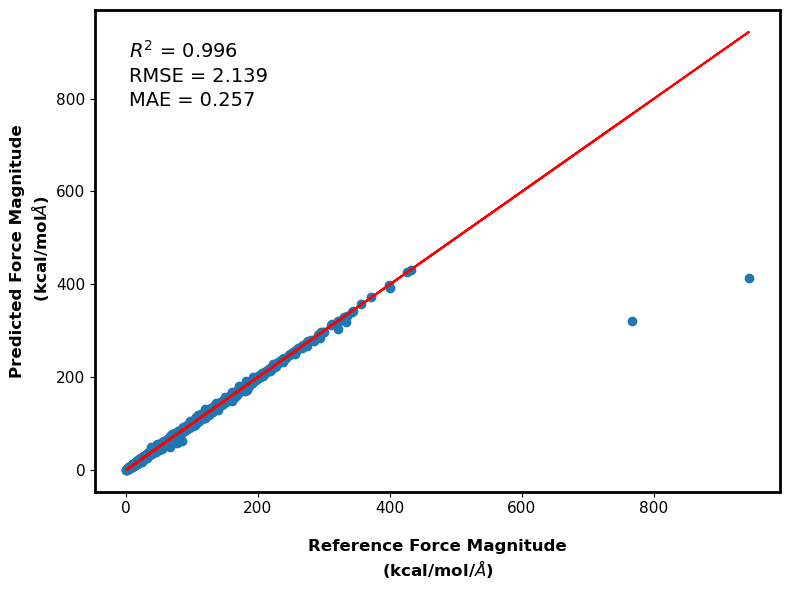

In [13]:
# Determine the magnitud of the foreces for the test data
test_pred_fmag = np.sqrt(test_pred_fx**2 + test_pred_fy**2 + test_pred_fz**2)
test_fmag = np.sqrt(test_fx**2 + test_fy**2 + test_fz**2)

# Determine the r2 value for the magnitude of the forces
test_r2_fmag = r2_score(test_pred_fmag, test_fmag)

# Determine the rmse for the magnitude of the forces
test_rmse_fmag = np.sqrt(np.mean((test_pred_fmag - test_fmag)**2))

# Determine the MAE for the magnitude of the forces
test_mae_fmag = np.mean(np.abs(test_pred_fmag - test_fmag))

# Plot the predicted magnitude of the forces vs the test magnitude of the forces
plt.figure(figsize=(8, 6))
plt.scatter(test_fmag, test_pred_fmag)
plt.plot(test_fmag, test_fmag, color='red')
plt.text(0.05, 0.9, '$R^2$ = %0.3f' % test_r2_fmag, transform=plt.gca().transAxes, fontsize=14)
plt.text(0.05, 0.85, 'RMSE = %0.3f' % test_rmse_fmag, transform=plt.gca().transAxes, fontsize=14)
plt.text(0.05, 0.8, 'MAE = %0.3f' % test_mae_fmag, transform=plt.gca().transAxes, fontsize=14)
# plt.title('Model BD: CLC Force Prediction Test\n', fontsize=20, fontweight='bold')
plt.xlabel('\nReference Force Magnitude\n(kcal/mol/$\\AA$)', fontsize=12, fontweight='bold')
plt.ylabel('Predicted Force Magnitude\n (kcal/mol$\\AA$)', fontsize=12, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=11)
# Darken the borders of the plot
ax = plt.gca()
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

plt.tight_layout()

# Save the figure
#plt.savefig('Force_ModA_Preds.png', dpi=400, bbox_inches='tight')
plt.show()

